<center><b>CSCE604137 • Penambangan Data</b></center>
<center><b>Fakultas Ilmu Komputer, Universitas Indonesia</b></center>
<center><b>Tugas Kelompok 2 - Time Series Analysis</b></center>

<b>Kelompok 4</b>


<b>Anggota</b>:
* Jonathan Amadeus (1906400261)
* Hendrico Kristiawan (1906350912)

# Install Library

In [132]:
!pip install --upgrade pip
!pip install requests
!pip install bs4
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Library

In [133]:
import requests
import json
import seaborn as sns
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from collections import Counter
from matplotlib import pyplot as plt

%matplotlib inline
figsize = (15, 10)

# Web Scraping

In [134]:
url = 'https://www.macrotrends.net/1333/historical-gold-prices-100-year-chart'
page = requests.get(url)

In [135]:
soup = BeautifulSoup(page.content)
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="/assets/images/icons/FAVICON/macro-trends_favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <meta content="1228954C688F5907894001CD8E5E624B" name="msvalidate.01"/>
  <meta content="6MnD_3iDtAP1ZyoGK1YMyVIVck4r5Ws80I9xD3ue4_A" name="google-site-verification"/>
  <!-- Load in Roboto Font -->
  <link href="https://fonts.googleapis.com/css?family=Roboto:400,600,700" rel="stylesheet"/>
  <!-- Jquery, Bootstrap and Menu Javascript -->
  <script crossorigin="anonymous" integrity="sha256-FgpCb/KJQlLNfOu91ta32o/NMZxltwRo8QtmkMRdAu8=" src="//code.jquery.com/jquery-3.3.1.min.js">
  </script>


Karena ini adalah static website, maka hanya perlu menggunakan BeautifulSoup.

In [136]:
rows = []

ths = soup.find_all('thead')[1].find_all('th')
row = []
for th in ths:
    row.append(th.text)
rows.append(row)

trs = soup.tbody.find_all('tr')
for tr in trs:
    tds = tr.find_all('td')
    row = []
    for td in tds:
        row.append(td.text)
    rows.append(row)

df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.rename(columns = {'AverageClosing Price': 'Average Closing Price', 'Annual% Change': 'Annual % Change'})
df = df[::-1].reset_index(drop=True)
df = df.set_index("Year")
df

,Average Closing Price,Year Open,Year High,Year Low,Year Close,Annual % Change
Year,,,,,,
1969,$41.10,$41.80,$43.75,$35.00,$35.21,-16.07%
1970,$35.96,$35.13,$39.19,$34.78,$37.38,6.16%
1971,$40.80,$37.33,$43.90,$37.33,$43.50,16.37%
1972,$58.17,$43.73,$70.00,$43.73,$64.70,48.74%
1973,$97.12,$64.99,$127.00,$64.10,$112.25,73.49%
1974,$158.76,$114.75,$197.50,$114.75,$187.50,67.04%
1975,$160.87,$185.00,$186.25,$128.75,$140.25,-25.20%
1976,$124.80,$140.35,$140.35,$103.05,$134.55,-4.06%
1977,$147.84,$136.10,$168.15,$129.40,$165.60,23.08%


Selanjutnya kami juga melakukan scraping pada grafik menggunakan selenium. Namun karena membutuhkan kursor, maka kami menggunakannya pada notebook yang berbeda dan menjalankannya pada lokal. File notebook dapat dilihat pada [github](https://github.com/IoriU/macrotrends-gold-scrap).

In [137]:
gold_df = pd.read_csv("https://raw.githubusercontent.com/IoriU/macrotrends-gold-scrap/main/emas_data.csv")
gold_df.head()

,Time,Value
0,"Jun, 1965",$323.05
1,"May, 1965",$325.10
2,"Apr, 1965",$325.10
3,"Mar, 1965",$326.16
4,"Feb, 1965",$327.18


# Preprocessing

In [138]:
def strip_char(df, char):
    for col in df:
        df[col] = df[col].str.replace(char, '')
    return df

df = strip_char(df, '$')
df = strip_char(df, ',')
df = strip_char(df, '%')

for col in df:
    df[col] = pd.to_numeric(df[col])

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Average Closing Price,Year Open,Year High,Year Low,Year Close,Annual % Change
Year,,,,,,
1969,41.10,41.80,43.75,35.00,35.21,-16.07
1970,35.96,35.13,39.19,34.78,37.38,6.16
1971,40.80,37.33,43.90,37.33,43.50,16.37
1972,58.17,43.73,70.00,43.73,64.70,48.74
1973,97.12,64.99,127.00,64.10,112.25,73.49


In [139]:
df_only_annual = df["Annual % Change"].to_frame()
df_only_annual.head(3)

,Annual % Change
Year,
1969,-16.07
1970,6.16
1971,16.37


In [140]:
gold_df["Time"] = pd.to_datetime(gold_df["Time"])

In [141]:
gold_df["Value"] = gold_df["Value"].str.replace("$", '')
gold_df["Value"] = gold_df["Value"].str.replace(",", '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [142]:
gold_df["Value"] = gold_df["Value"].astype(float)

In [143]:
gold_df.head()

,Time,Value
0,1965-06-01,323.05
1,1965-05-01,325.10
2,1965-04-01,325.10
3,1965-03-01,326.16
4,1965-02-01,327.18


In [144]:
gold_df.isnull().sum()

Time     0
Value    0
dtype: int64

In [145]:
gold_df.shape

(1215, 2)

In [146]:
gold_df = gold_df.drop_duplicates()

In [147]:
gold_df.loc['1969-01-01':'2022-05-01']

,Time,Value
197,1947-11-01,438.06
198,1947-10-01,439.95
199,1947-09-01,439.95
200,1947-08-01,449.72
201,1947-06-01,459.94
202,1947-05-01,462.04


In [148]:
gold_df = gold_df.set_index("Time")
gold_df.drop(gold_df.tail(1).index,inplace=True) # drop last n rows
gold_df = gold_df.sort_values("Time")
gold_df.head()
gold_df = gold_df.loc['1969-01-01':'2022-05-01'].reset_index()

In [149]:
gold_year_df = gold_df.resample('Y', on='Time').agg({'sum', 'mean', 'min','max'})

In [150]:
gold_year_df.head()

Value                         
                  mean     min     max      sum
Time                                           
1969-12-31  329.865455  321.18  340.11  3628.52
1970-12-31  272.421818  265.57  279.61  2996.64
1971-12-31  290.643636  275.16  305.84  3197.08
1972-12-31  398.639091  321.81  461.43  4385.03
1973-12-31  632.728333  442.11  786.23  7592.74

In [151]:
sum_val = gold_year_df["Value"]["sum"]

In [152]:
annual_change = []
for i in range(len(sum_val)):
  if (i == 0):
    annual_change.append(0)
  else:
    annual_change.append((sum_val[i] - sum_val[i-1]) * 100 / sum_val[i-1] )

In [153]:
gold_year_df = gold_year_df.assign(Annual_Change=annual_change)
gold_year_df.drop(gold_year_df.tail(1).index,inplace=True)
gold_year_df.head()

Value                          Annual_Change
                  mean     min     max      sum              
Time                                                         
1969-12-31  329.865455  321.18  340.11  3628.52      0.000000
1970-12-31  272.421818  265.57  279.61  2996.64    -17.414263
1971-12-31  290.643636  275.16  305.84  3197.08      6.688825
1972-12-31  398.639091  321.81  461.43  4385.03     37.157344
1973-12-31  632.728333  442.11  786.23  7592.74     73.151381

In [154]:
change_df = gold_year_df.drop("Value", axis=1)
change_df.head()

,Annual_Change
,
Time,
1969-12-31,0.000000
1970-12-31,-17.414263
1971-12-31,6.688825
1972-12-31,37.157344
1973-12-31,73.151381


# EDA

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1969 to 2022
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Average Closing Price  54 non-null     float64
 1   Year Open              54 non-null     float64
 2   Year High              54 non-null     float64
 3   Year Low               54 non-null     float64
 4   Year Close             54 non-null     float64
 5   Annual % Change        54 non-null     float64
dtypes: float64(6)
memory usage: 3.0+ KB


In [156]:
df.shape

(54, 6)

In [157]:
df.describe()

,Average Closing Price,Year Open,Year High,Year Low,Year Close,Annual % Change
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,615.161481,597.865370,703.203519,544.099259,627.673889,9.927778
std,522.941438,507.545973,585.269833,469.351612,524.811178,27.010249
min,35.960000,35.130000,39.190000,34.780000,35.210000,-32.150000
25%,297.342500,283.462500,329.512500,266.200000,289.612500,-3.922500
50%,383.900000,397.000000,432.075000,363.200000,395.500000,5.325000
75%,948.337500,862.500000,1169.562500,782.875000,1011.400000,21.190000
max,1881.880000,1946.600000,2058.400000,1785.920000,1895.100000,133.410000


In [158]:
df.isnull().sum()

Average Closing Price    0
Year Open                0
Year High                0
Year Low                 0
Year Close               0
Annual % Change          0
dtype: int64

In [159]:
df.nunique()

Average Closing Price    54
Year Open                54
Year High                54
Year Low                 54
Year Close               54
Annual % Change          54
dtype: int64

In [160]:
df.nlargest(5, 'Annual % Change')

,Average Closing Price,Year Open,Year High,Year Low,Year Close,Annual % Change
Year,,,,,,
1979,307.01,227.15,524.00,216.55,524.00,133.41
1973,97.12,64.99,127.00,64.10,112.25,73.49
1974,158.76,114.75,197.50,114.75,187.50,67.04
1972,58.17,43.73,70.00,43.73,64.70,48.74
1978,193.57,168.60,243.65,166.30,224.50,35.57


In [161]:
df.nsmallest(5, 'Annual % Change')

,Average Closing Price,Year Open,Year High,Year Low,Year Close,Annual % Change
Year,,,,,,
1981,459.16,592.0,599.25,391.75,400.00,-32.15
2013,1409.51,1681.5,1692.50,1192.75,1201.50,-27.79
1975,160.87,185.0,186.25,128.75,140.25,-25.20
1997,331.00,367.8,367.80,283.05,289.20,-21.74
1984,360.65,384.0,406.85,303.25,309.00,-19.00


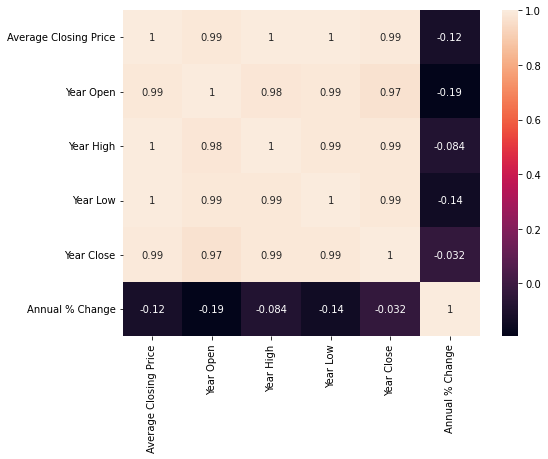

In [162]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)

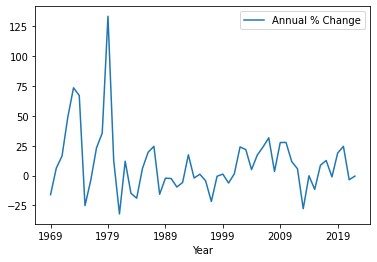

In [163]:
df.plot.line(y='Annual % Change')

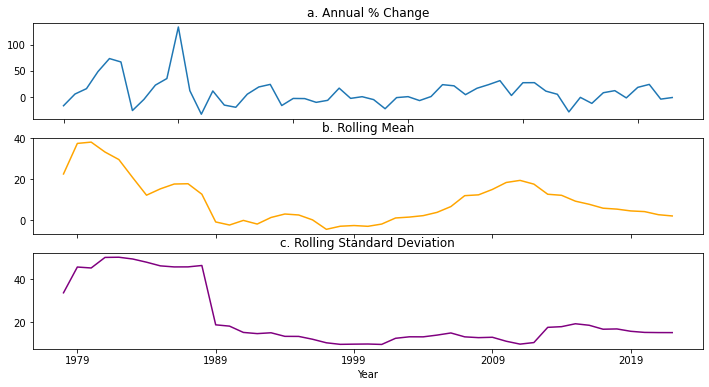

In [164]:
fig, axes = plt.subplots(nrows=3, ncols=1)
df['Annual % Change'].plot(ax=axes[0], figsize=(12,6), rot=90, title='a. Annual % Change', sharex=True)
df['Annual % Change'].rolling(10).mean().plot(ax=axes[1], figsize=(12,6), rot=90, title='b. Rolling Mean', color='orange')
df['Annual % Change'].rolling(10).std().plot(ax=axes[2], figsize=(12,6), rot=0, title='c. Rolling Standard Deviation', color='purple')
plt.show()

Dari rolling mean diatas, dapat dilihat bahwa annual % change tidak memiliki trend. 
Dari grafik annual % change juga tidak ditemukan adanya seasonality yang dapat ditemukan.


In [165]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['Annual % Change'].values.flatten())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.104348
p-value: 0.000953


Selanjutnya berdasarkan Augmented Dickey Fuller test,didapatkan nilai p < 0.05 sehingga data annual % change merupakan data yang stasioner.

In [166]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    596 non-null    datetime64[ns]
 1   Value   596 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.4 KB


In [167]:
gold_df.shape

(596, 2)

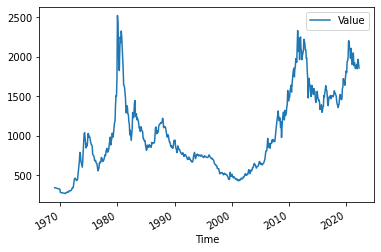

In [168]:
gold_df.plot.line(x = "Time", y='Value')

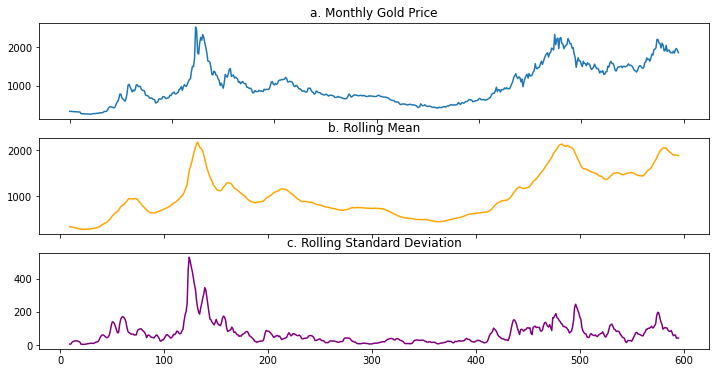

In [169]:
fig, axes = plt.subplots(nrows=3, ncols=1)
gold_df['Value'].plot(ax=axes[0], figsize=(12,6), rot=90, title='a. Monthly Gold Price', sharex=True)
gold_df['Value'].rolling(10).mean().plot(ax=axes[1], figsize=(12,6), rot=90, title='b. Rolling Mean', color='orange')
gold_df['Value'].rolling(10).std().plot(ax=axes[2], figsize=(12,6), rot=0, title='c. Rolling Standard Deviation', color='purple')
plt.show()

Untuk data yang didapatkan dari grafik, juga tida ditemukan adanya trend dan seasonal.

In [170]:
result = adfuller(gold_df['Value'].values.flatten())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.200221
p-value: 0.206165


Namun berdasarkan test, didapatkan bahwa data monthly price tidak stasioner.

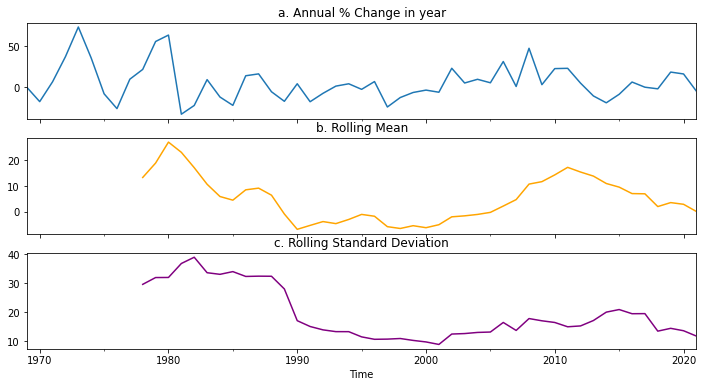

In [171]:
fig, axes = plt.subplots(nrows=3, ncols=1)
gold_year_df["Annual_Change"].plot(ax=axes[0], figsize=(12,6), rot=90, title='a. Annual % Change in year', sharex=True)
gold_year_df["Annual_Change"].rolling(10).mean().plot(ax=axes[1], figsize=(12,6), rot=90, title='b. Rolling Mean', color='orange')
gold_year_df["Annual_Change"].rolling(10).std().plot(ax=axes[2], figsize=(12,6), rot=0, title='c. Rolling Standard Deviation', color='purple')
plt.show()

In [172]:
result = adfuller(gold_year_df["Annual_Change"].values.flatten())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.939835
p-value: 0.000029


Data annual % change yang didapatkan dari monthly price memiliki sifat yang sama seperti data annual % change yang diambil dari tabel pada website.

# Modeling

Menggunakan berbagai macam metrik agar mendapat lebih banyak informasi ketika dibandingkan.

In [173]:
# Accuracy metrics
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                  # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [174]:
# prepare data for lstm
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

def series_to_lag(data, col_name, n_in=1, n_out=1, dropnan=True, ):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = DataFrame(data)
  cols, names = list(), list()
	# input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('%s(t-%d)' % (col_name[j], i)) for j in range(n_vars)]
  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('%s(t)' % (col_name[j])) for j in range(n_vars)]
    else:
      names += [('%s(t+%d)' % (col_name[j], i)) for j in range(n_vars)]
  # put it all together
  agg = concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True)
    agg = agg.reset_index(drop=True)
  return agg

In [175]:
# - scaler   = the scaler object (it needs an inverse_transform method)
# - data     = the data to be inverse transformed as a Series, ndarray, ... 
#              (a 1d object you can assign to a df column)
# - ftName   = the name of the column to which the data belongs
# - colNames = all column names of the data on which scaler was fit 
#              (necessary because scaler will only accept a df of the same shape as the one it was fit on)
def invTransform(scaler, data, colName, colNames):
    dummy = pd.DataFrame(np.zeros((len(data), len(colNames))), columns=colNames)
    dummy[colName] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=colNames)
    return dummy[colName].values

In [176]:
def inverse_multistep(series, col_name, scaler):
  inv = pd.DataFrame(np.zeros(series.shape)).values
  for i in range(len(series[0])):
    inv[:,i] = invTransform(scaler, series[:,i], col_name[-1], col_name)
  return inv

## Annual % Change

### ARIMA

#### Using Only Annual % Change (Univariate)

In [177]:
annual_values = df_only_annual.values
annual_list = annual_values.flatten()

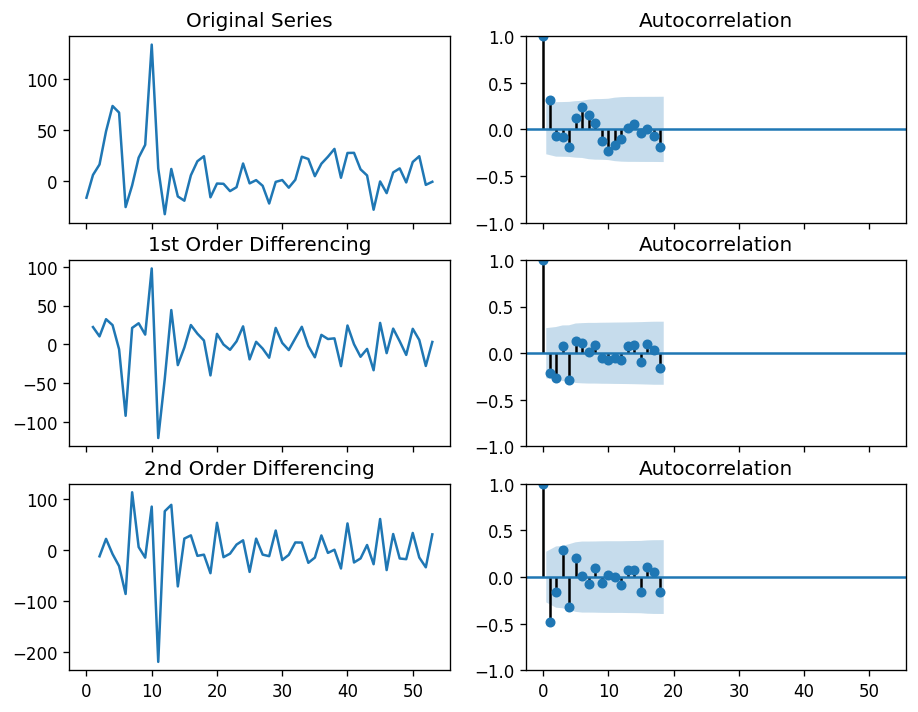

In [178]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_only_annual.values); axes[0, 0].set_title('Original Series')
plot_acf(df_only_annual.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_only_annual.diff().values); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_only_annual.diff().dropna().values, ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_only_annual.diff().diff().values); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_only_annual.diff().diff().dropna().values, ax=axes[2, 1])

plt.show()

In [179]:
from pmdarima.arima.utils import ndiffs
y = df_only_annual.values

## Adf Test
print(ndiffs(y, test='adf'))  

# KPSS test
print(ndiffs(y, test='kpss'))  

# PP test:
print(ndiffs(y, test='pp')) 

0
0
0


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


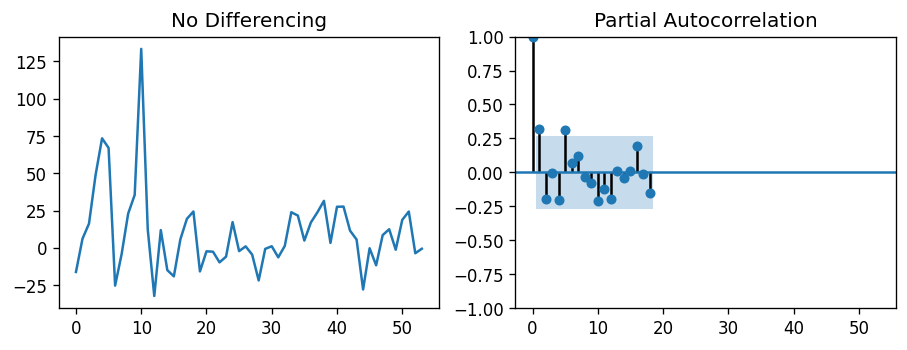

In [180]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(annual_values); axes[0].set_title('No Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(annual_values, ax=axes[1])

plt.show()

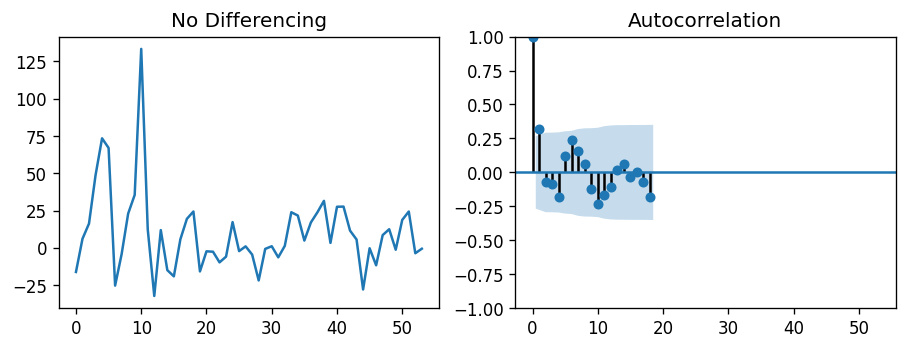

In [181]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(annual_values); axes[0].set_title('No Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(annual_values, ax=axes[1])

plt.show()

In [182]:
import statsmodels.api as sm

# 1,1,2 ARIMA Model
model = sm.tsa.arima.ARIMA(annual_values, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   54
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -248.977
Date:                Thu, 16 Jun 2022   AIC                            505.954
Time:                        14:01:42   BIC                            513.910
Sample:                             0   HQIC                           509.022
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8011      6.168      1.589      0.112      -2.287      21.889
ar.L1         -0.3801      0.207     -1.834      0.067      -0.786       0.026
ma.L1          0.8110      0.174      4.671      0.0

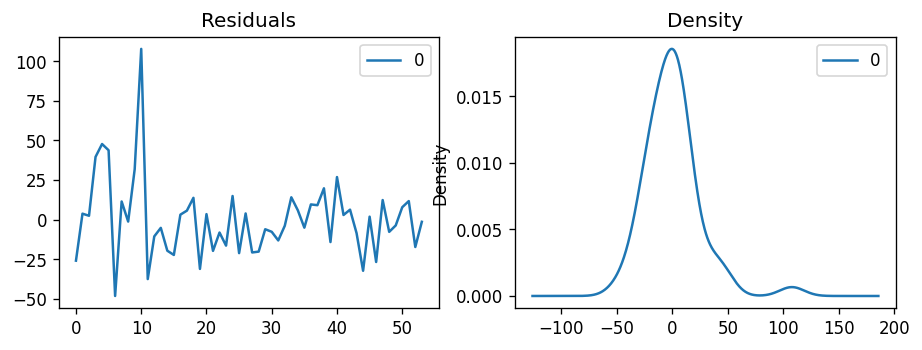

In [183]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

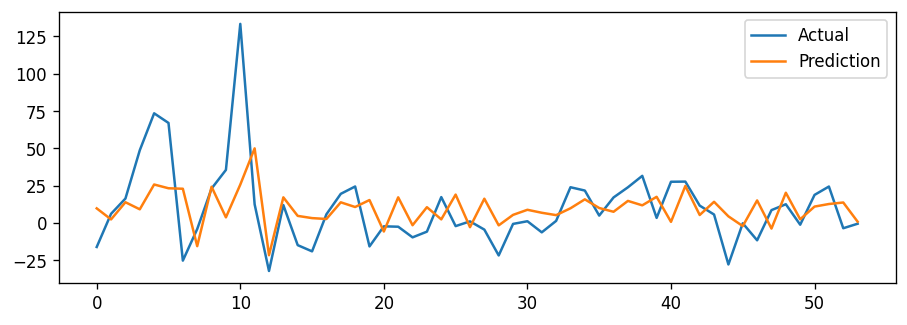

In [184]:
pred = model_fit.predict(dynamic=False)
plt.plot(annual_values, label="Actual")
plt.plot(pred, label="Prediction")
plt.legend()
plt.show()

In [185]:
n = len(annual_list)
y_train = annual_list[0:int(n*0.7)]
y_test = annual_list[int(n*0.7):]

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   37
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -175.141
Date:                Thu, 16 Jun 2022   AIC                            358.282
Time:                        14:01:44   BIC                            364.726
Sample:                             0   HQIC                           360.554
                                 - 37                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2320      9.551      1.071      0.284      -8.488      28.952
ar.L1         -0.3314      0.256     -1.297      0.195      -0.832       0.170
ma.L1          0.8001      0.227      3.528      0.0

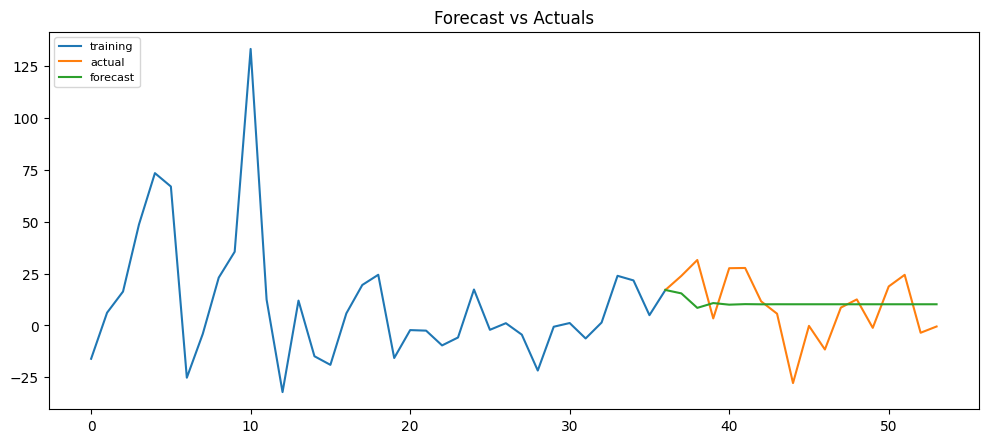

In [186]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = sm.tsa.arima.ARIMA(y_train, order=(1, 0, 1))  
fitted = model.fit()  
print(fitted.summary())
# Forecast
y_pred = fitted.forecast(len(y_test), alpha=0.05)  # 95% conf

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(range(0,len(y_train)) , y_train, label='training')
plt.plot(range(len(y_train)-1, len(y_train) + len(y_test)), np.concatenate(([[y_train.flatten()[-1]], y_test.flatten()])), label='actual')
plt.plot(range(len(y_train)-1, len(y_train) + len(y_pred)), np.concatenate(([[y_train.flatten()[-1]], y_pred])), label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [187]:
forecast_accuracy(y_pred, y_test.flatten())

{'acf1': 0.23914368433269884,
 'corr': 0.09705081081931019,
 'mae': 12.51831698199139,
 'mape': 5.920959611542709,
 'me': 1.5605193380083355,
 'minmax': 0.9031895562332853,
 'mpe': -5.549425481957327,
 'rmse': 15.421948615969713}

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   54
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -248.977
Date:                Thu, 16 Jun 2022   AIC                            505.954
Time:                        14:01:45   BIC                            513.910
Sample:                             0   HQIC                           509.022
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8011      6.168      1.589      0.112      -2.287      21.889
ar.L1         -0.3801      0.207     -1.834      0.067      -0.786       0.026
ma.L1          0.8110      0.174      4.671      0.0

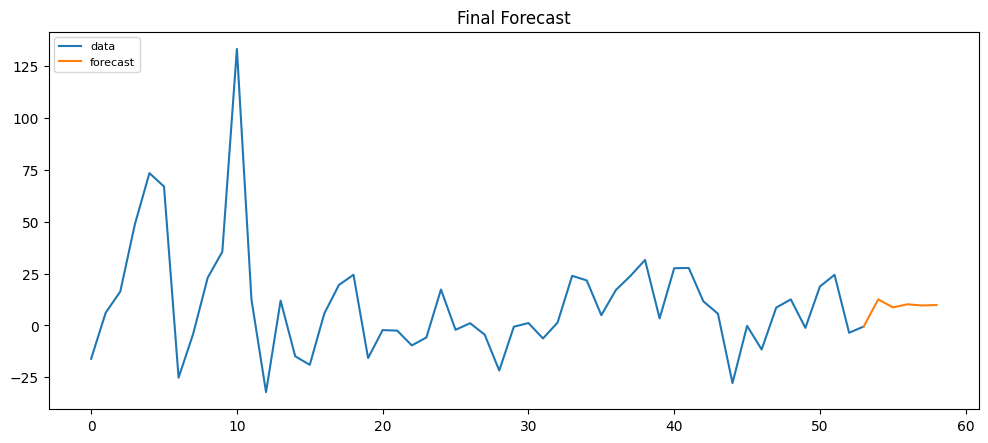

In [188]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = sm.tsa.arima.ARIMA(annual_list, order=(1, 0, 1))  
fitted = model.fit()  
print(fitted.summary())
# Forecast
y_pred = fitted.forecast(5, alpha=0.05)  # 95% conf

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(annual_list, label='data')
plt.plot(range(len(annual_list)-1, len(annual_list) + len(y_pred)), np.concatenate(([[annual_list[-1]], y_pred])), label='forecast')
plt.title('Final Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [189]:
import pmdarima as pm
model = pm.auto_arima(annual_values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=508.617, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=517.191, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=509.635, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=507.702, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=509.204, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=510.027, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=506.143, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=512.227, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=505.954, Time=0.33 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=508.518, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=507.758, Time=0.41 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=507.773, Time=0.40 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=506.641, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=508.634, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=509.7

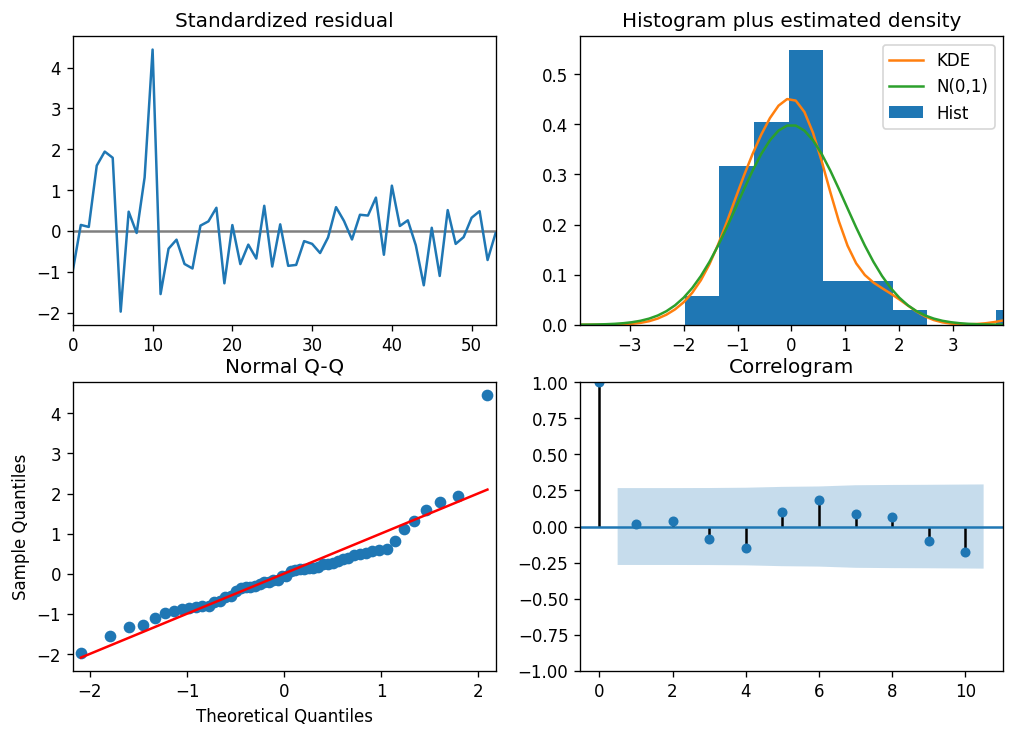

In [190]:
model.plot_diagnostics(figsize=(10,7))
plt.show()

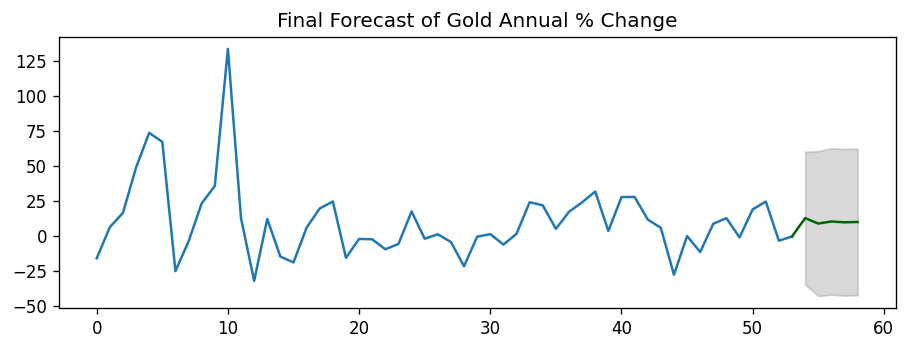

In [191]:
# Forecast
n_periods = 5
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(annual_values), len(annual_values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(annual_values)
plt.plot(range(len(annual_values)-1, len(annual_values) + 5), np.concatenate(([[annual_list[-1]], fc_series])), color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Gold Annual % Change")
plt.show()

#### Using Annual % Change From Monthly Gold Prices (Univariate)

In [240]:
n = len(change_df.values)
y_train = change_df.values.flatten()[0:int(n*0.7)]
y_test = change_df.values.flatten()[int(n*0.7):]

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=336.642, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=342.895, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=338.341, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=334.698, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=336.588, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=338.573, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=335.997, Time=0.28 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.253 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   37
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -165.349
Date:                Thu, 16 Jun 2022   AIC                            334.698
Time:                        14:30:14   BIC                            337.920
Sample:                       

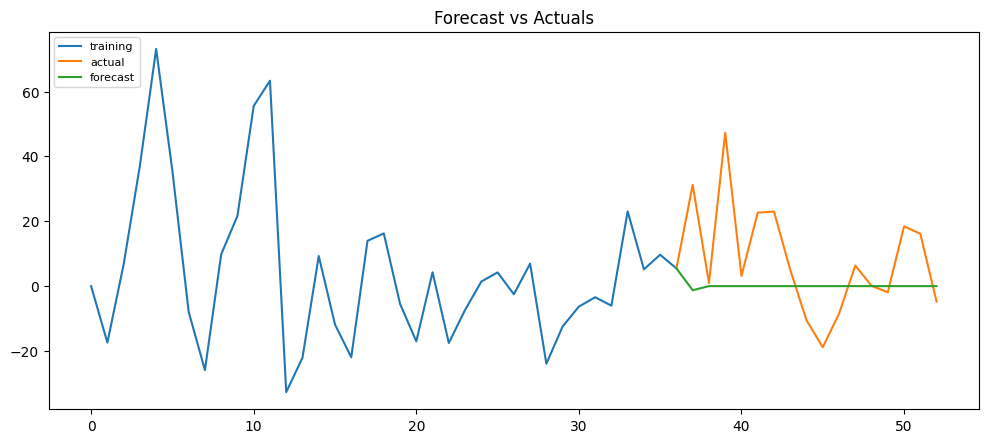

In [242]:
# Build Model
import pmdarima as pm
model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())
# Forecast
y_pred = model.predict(len(y_test), alpha=0.05)  # 95% conf

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(range(0,len(y_train)) , y_train, label='training')
plt.plot(range(len(y_train)-1, len(y_train) + len(y_test)), np.concatenate(([[y_train.flatten()[-1]], y_test.flatten()])), label='actual')
plt.plot(range(len(y_train)-1, len(y_train) + len(y_pred)), np.concatenate(([[y_train.flatten()[-1]], y_pred])), label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [243]:
forecast_accuracy(y_pred, y_test.flatten())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


{'acf1': 0.10149728176766697,
 'corr': -0.3584007613918267,
 'mae': 13.764870489518001,
 'mape': 1.0025091672793331,
 'me': -8.19456399710945,
 'minmax': inf,
 'mpe': -1.0025091672793331,
 'rmse': 18.677249660651498}

In [249]:
import pmdarima as pm
model = pm.auto_arima(change_df.values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=477.826, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=483.223, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=477.020, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=476.143, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=477.607, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=476.922, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=476.208, Time=0.12 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.634 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   53
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -236.071
Date:                Thu, 16 Jun 2022   AIC                            476.143
Time:                        14:32:46   BIC                            480.083
Sample:                       

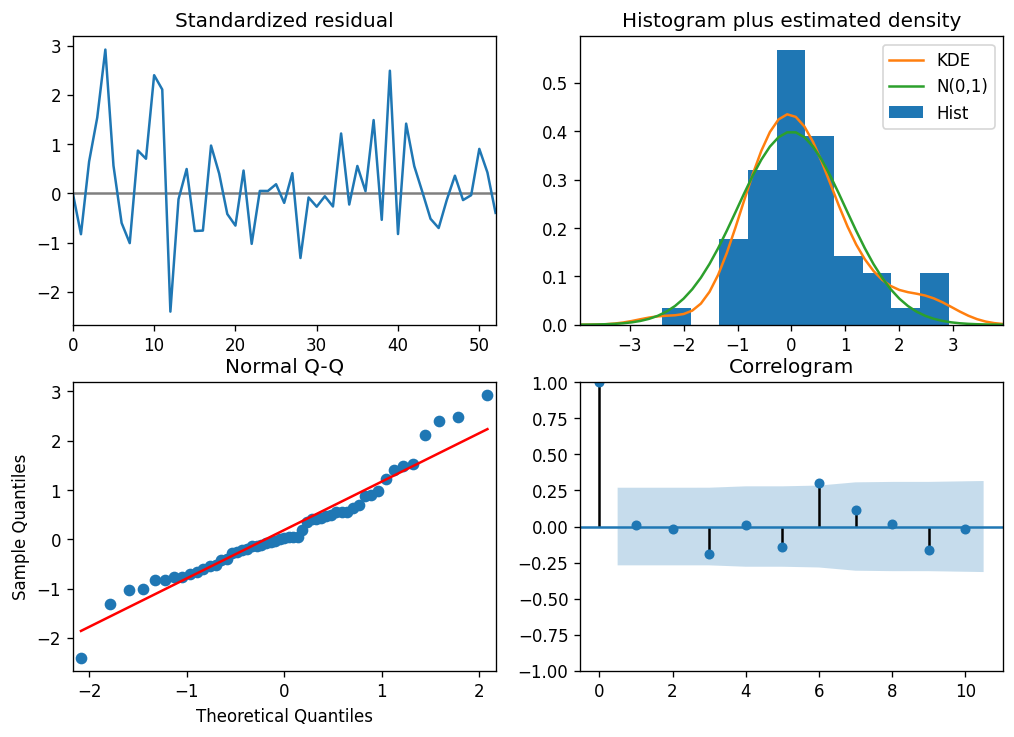

In [250]:
model.plot_diagnostics(figsize=(10,7))
plt.show()

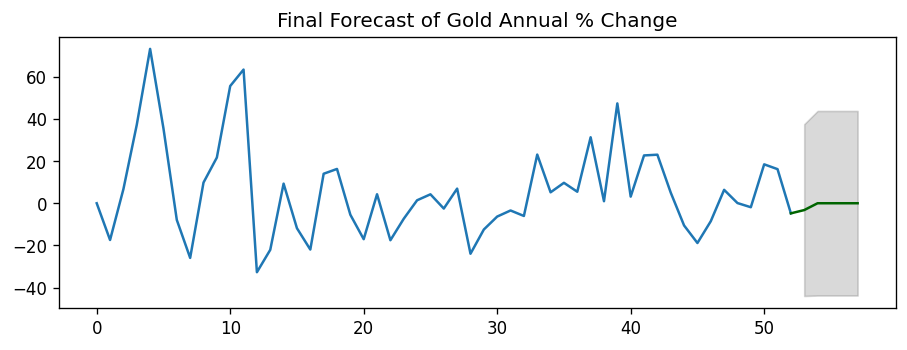

In [251]:
# Forecast
n_periods = 5
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(change_df.values), len(change_df.values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(change_df.values)
plt.plot(range(len(change_df.values)-1, len(change_df.values) + 5), np.concatenate(([[change_df.values.flatten()[-1]], fc_series])), color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Gold Annual % Change")
plt.show()

### Keras

In [192]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras import activations
from keras import callbacks

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


#### Using All Attribut From Table (Multivariate)




In [194]:
n_lag = 10
n_seq = 5
n_features = 6
# prepare data
col_name = df.columns
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_values = scaler.fit_transform(df)
# transform into supervised learning problem X, y
lag = series_to_lag(scaled_values, col_name, n_lag, n_seq)
lag = lag.drop([('%s(t)' % (col_name[i])) for i in range(0,len(df.columns) - 1)], axis = 1)
for i in range(1,n_seq):
  lag = lag.drop([('%s(t+%d)' % (col_name[j], i)) for j in range(0,len(df.columns) - 1)], axis = 1)
lag_values = lag.values
n = len(lag_values)
# split into train and test sets
train, validation, test = lag_values[0:int(n*0.7), :], lag_values[int(n*0.7):int(n*0.9), :], lag_values[int(n*0.9):, :]

In [195]:
n_obs = n_lag * n_features
train_X, train_y = train[:, :n_obs], train[:, n_obs:]
val_X, val_y = validation[:, :n_obs], validation[:, n_obs:]
test_X, test_y = test[:, :n_obs], test[:, n_obs:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_lag, n_features))
val_X = val_X.reshape((val_X.shape[0], n_lag, n_features))
test_X = test_X.reshape((test_X.shape[0], n_lag, n_features))
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)

(28, 10, 6) (28, 5) (8, 10, 6) (8, 5) (4, 10, 6) (4, 5)


Epoch 1/50
28/28 - 17s - loss: 0.2453 - accuracy: 0.1786 - val_loss: 0.3544 - val_accuracy: 0.2500 - 17s/epoch - 591ms/step
Epoch 2/50
28/28 - 1s - loss: 0.1841 - accuracy: 0.1071 - val_loss: 0.3477 - val_accuracy: 0.2500 - 725ms/epoch - 26ms/step
Epoch 3/50
28/28 - 1s - loss: 0.2190 - accuracy: 0.1786 - val_loss: 0.3103 - val_accuracy: 0.1250 - 564ms/epoch - 20ms/step
Epoch 4/50
28/28 - 1s - loss: 0.2642 - accuracy: 0.1429 - val_loss: 0.1988 - val_accuracy: 0.2500 - 620ms/epoch - 22ms/step
Epoch 5/50
28/28 - 1s - loss: 0.2187 - accuracy: 0.1429 - val_loss: 0.2077 - val_accuracy: 0.1250 - 641ms/epoch - 23ms/step
Epoch 6/50
28/28 - 1s - loss: 0.1929 - accuracy: 0.1429 - val_loss: 0.1886 - val_accuracy: 0.1250 - 766ms/epoch - 27ms/step
Epoch 7/50
28/28 - 1s - loss: 0.1984 - accuracy: 0.1786 - val_loss: 0.1960 - val_accuracy: 0.2500 - 764ms/epoch - 27ms/step
Epoch 8/50
28/28 - 1s - loss: 0.1945 - accuracy: 0.2143 - val_loss: 0.1837 - val_accuracy: 0.1250 - 603ms/epoch - 22ms/step
Epoch 9/

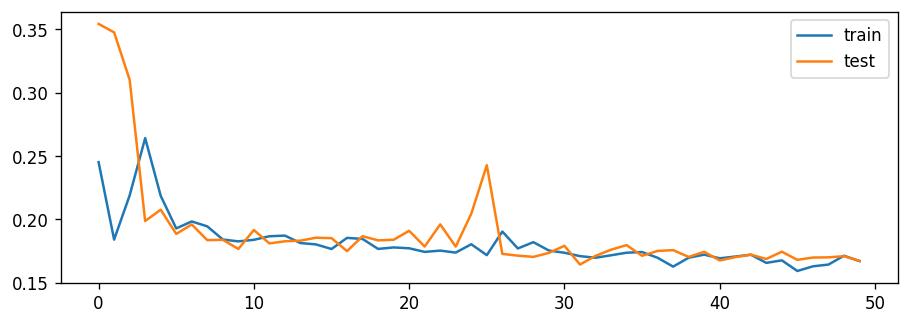

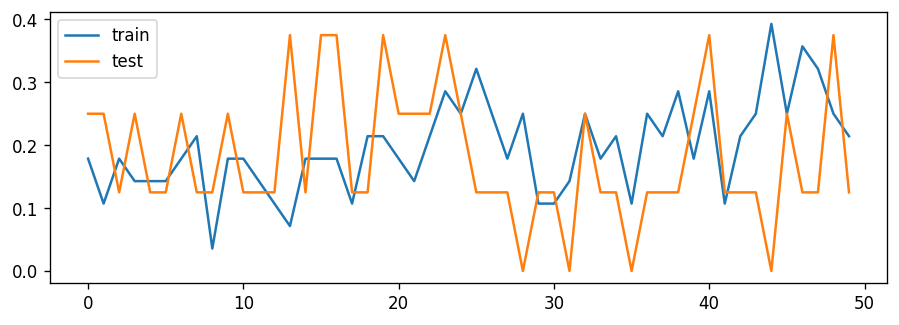

In [196]:
# fit an LSTM network to training data
n_batch = 1
model = Sequential()
# model.add(LSTM(50, batch_input_shape=(n_batch, train_X.shape[1], train_X.shape[2]), stateful=True))
# callback = callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=1, verbose=1)
model.add(LSTM(100, batch_input_shape=(n_batch, train_X.shape[1], train_X.shape[2]), stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(100,stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(100,stateful=True))
model.add(Dense(train_y.shape[1]))
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_y, epochs=50, validation_data=(val_X, val_y), batch_size=n_batch ,verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [197]:
y_pred = model.predict(test_X, batch_size = n_batch)

In [198]:
inv_pred_y = inverse_multistep(y_pred, col_name, scaler)
inv_test_y = inverse_multistep(test_y, col_name, scaler)

In [199]:
for i in range(len(inv_test_y[0])):
  print("Error t+"+str(i+1))
  print(forecast_accuracy(inv_pred_y[:,i], inv_test_y[:,i]))

Error t+1
{'mape': 7.460627916104326, 'me': 12.409298510998491, 'mae': 13.032451822012668, 'mpe': -7.276071501562921, 'rmse': 17.766745106804787, 'acf1': -0.10686372908676664, 'corr': 0.22935904653712824, 'minmax': 1.8702944889429238}
Error t+2
{'mape': 4.099777480125227, 'me': 3.119111073911193, 'mae': 9.098981831967834, 'mpe': -3.9035558899090153, 'rmse': 10.210888518834949, 'acf1': 0.05586715578379801, 'corr': 0.3148692887731403, 'minmax': 0.6344552302983806}
Error t+3
{'mape': 1.8457385643515445, 'me': -2.441521294265981, 'mae': 6.002060439735648, 'mpe': -1.8457385643515445, 'rmse': 7.146008814746163, 'acf1': -0.5938183750572213, 'corr': 0.7288879742457075, 'minmax': 0.5958268237134068}
Error t+4
{'mape': 4.114339421281027, 'me': 7.626128805875782, 'mae': 13.143979772925375, 'mpe': -4.114339421281027, 'rmse': 18.110712297522745, 'acf1': -0.11310589043035013, 'corr': -0.12566067222925334, 'minmax': 0.71334140911401}
Error t+5
{'mape': 12.236017489074145, 'me': 0.3519740676879941, 'm

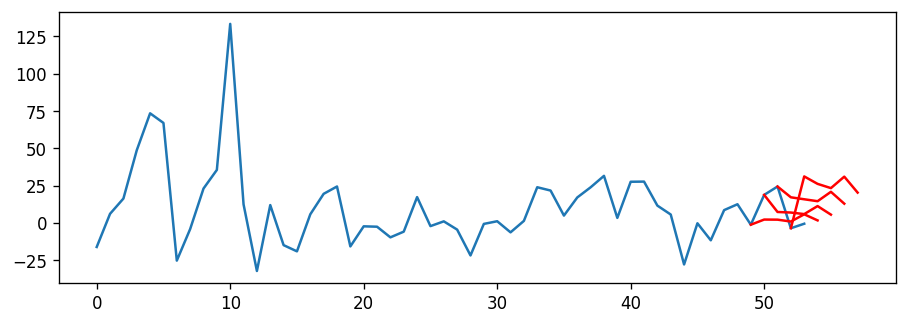

In [200]:
# plot the entire dataset in blue
pyplot.plot(df.values[:,-1])
# plot the forecasts in red
for i in range(len(test)):
  off_s = len(df) - len(test) + i - 1
  off_e = off_s + len(inv_pred_y[i]) + 1
  xaxis = [x for x in range(off_s, off_e)]
  yaxis = np.concatenate(([df.values[off_s][-1]], inv_pred_y[i]))
  pyplot.plot(xaxis, yaxis, color='red')
# show the plot
pyplot.show()

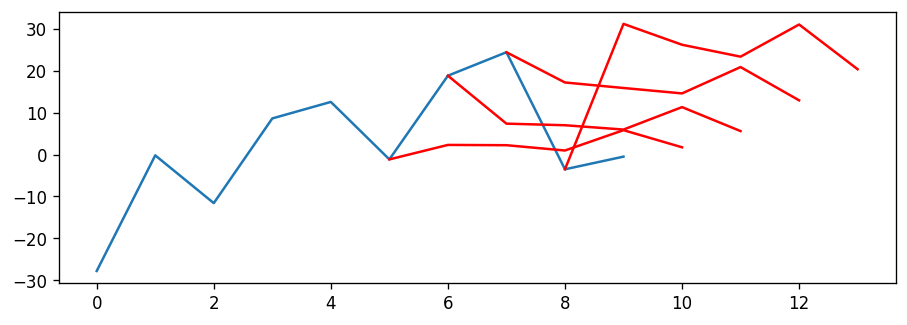

In [201]:
partial = df.values[-10:,-1]
pyplot.plot(partial)
# plot the forecasts in red
for i in range(len(test)):
  off_s = len(partial) - len(test) + i - 1
  off_e = off_s + len(inv_pred_y[i]) + 1
  xaxis = [x for x in range(off_s, off_e)]
  yaxis = np.concatenate(([partial[off_s]], inv_pred_y[i]))
  pyplot.plot(xaxis, yaxis, color='red')
# show the plot
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


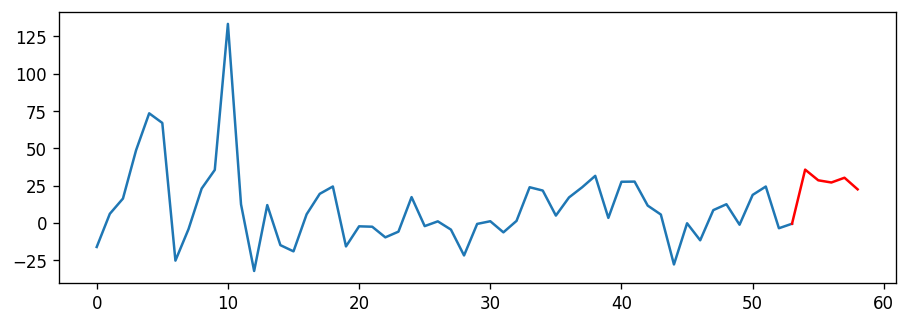

In [202]:
values = df.values
last10 = values[-n_lag:]
last10 = scaler.transform(last10)
last10 = last10.reshape(1, n_lag, n_features)
next5 = model.predict(last10)
# inv_next5 = scaler.transform(next5.T)
inv_next5 = inverse_multistep(next5, col_name, scaler)[0]
partial = df.values[:,-1]
pyplot.plot(partial)
off_s = len(partial) - 1
off_e = off_s + len(inv_next5) + 1
xaxis = [x for x in range(off_s, off_e)]
yaxis = np.concatenate(([partial[off_s]], inv_next5))
pyplot.plot(xaxis, yaxis, color='red')
# show the plot
pyplot.show()

#### Using Only Annual % Change (Univariate)

In [203]:

# transform series into train and test sets for supervised learning
def prepare_data(series, n_lag, n_seq):
  # rescale values to -1, 1
  col_name = series.columns[0]
  scaler = MinMaxScaler(feature_range=(-1, 1))
  scaled_values = scaler.fit_transform(series)
  scaled_values = scaled_values.reshape(len(scaled_values), 1)
  # transform into supervised learning problem X, y
  lag = series_to_lag(scaled_values, col_name, n_lag, n_seq)
  lag_values = lag.values
  n = len(lag_values)
  # split into train and test sets
  train, validation, test = lag_values[0:int(n*0.7), :], lag_values[int(n*0.7):int(n*0.9), :], lag_values[int(n*0.9):, :]
  return scaler, train, validation, test

In [204]:
n_lag = 10
n_seq = 5
# prepare data
scaler, train, validation, test = prepare_data(df_only_annual, n_lag, n_seq)

In [205]:
train_X, train_y = train[:, :n_lag], train[:, n_lag:]
val_X, val_y = validation[:, :n_lag], validation[:, n_lag:]
test_X, test_y = test[:, :n_lag], test[:, n_lag:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_lag, 1))
val_X = val_X.reshape((val_X.shape[0], n_lag, 1))
test_X = test_X.reshape((test_X.shape[0], n_lag, 1))
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)

(28, 10, 1) (28, 5) (8, 10, 1) (8, 5) (4, 10, 1) (4, 5)


Epoch 1/50
28/28 - 8s - loss: 0.2778 - accuracy: 0.1786 - val_loss: 0.3379 - val_accuracy: 0.1250 - 8s/epoch - 280ms/step
Epoch 2/50
28/28 - 0s - loss: 0.3064 - accuracy: 0.1429 - val_loss: 0.2538 - val_accuracy: 0.1250 - 393ms/epoch - 14ms/step
Epoch 3/50
28/28 - 0s - loss: 0.2667 - accuracy: 0.2143 - val_loss: 0.1967 - val_accuracy: 0.1250 - 411ms/epoch - 15ms/step
Epoch 4/50
28/28 - 0s - loss: 0.2251 - accuracy: 0.1786 - val_loss: 0.1736 - val_accuracy: 0.1250 - 394ms/epoch - 14ms/step
Epoch 5/50
28/28 - 0s - loss: 0.1977 - accuracy: 0.1786 - val_loss: 0.1910 - val_accuracy: 0.2500 - 429ms/epoch - 15ms/step
Epoch 6/50
28/28 - 0s - loss: 0.1940 - accuracy: 0.2143 - val_loss: 0.1764 - val_accuracy: 0.1250 - 443ms/epoch - 16ms/step
Epoch 7/50
28/28 - 0s - loss: 0.1934 - accuracy: 0.1071 - val_loss: 0.1687 - val_accuracy: 0.2500 - 401ms/epoch - 14ms/step
Epoch 8/50
28/28 - 0s - loss: 0.1863 - accuracy: 0.1429 - val_loss: 0.1736 - val_accuracy: 0.2500 - 397ms/epoch - 14ms/step
Epoch 9/50

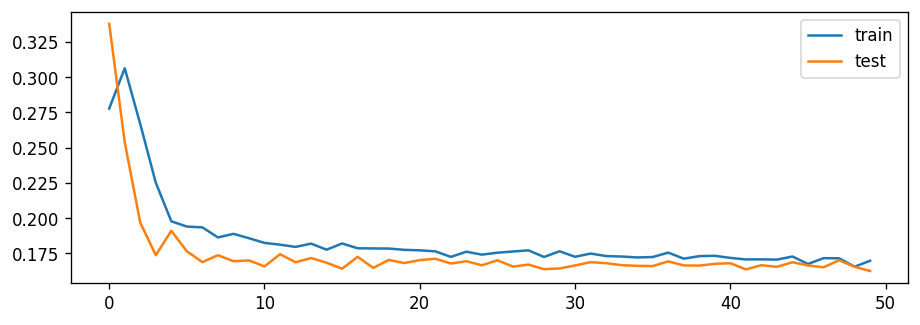

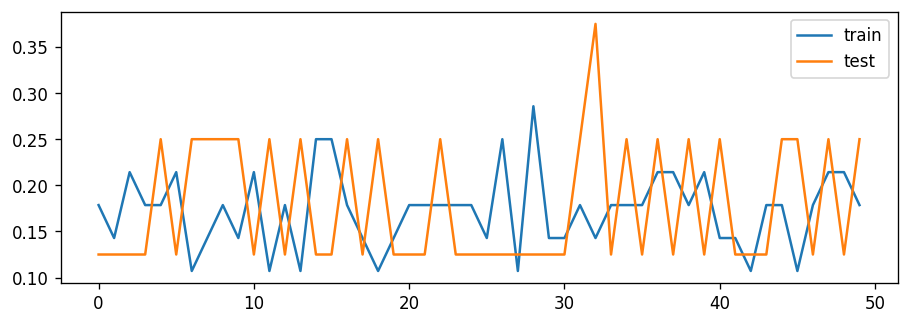

In [206]:
# fit an LSTM network to training data
n_batch = 1
model = Sequential()
# model.add(LSTM(50, batch_input_shape=(n_batch, train_X.shape[1], train_X.shape[2]), stateful=True))
# callback = callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=1, verbose=1)
model.add(LSTM(100, batch_input_shape=(n_batch, train_X.shape[1], train_X.shape[2]), stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(100,stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(100,stateful=True))
model.add(Dense(train_y.shape[1]))
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_y, epochs=50, validation_data=(val_X, val_y), batch_size=n_batch ,verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [207]:
y_pred = model.predict(test_X, batch_size = n_batch)

In [208]:
for i in range(len(inv_test_y[0])):
  print("Error t+"+str(i+1))
  print(forecast_accuracy(inv_pred_y[:,i], inv_test_y[:,i]))

Error t+1
{'mape': 7.460627916104326, 'me': 12.409298510998491, 'mae': 13.032451822012668, 'mpe': -7.276071501562921, 'rmse': 17.766745106804787, 'acf1': -0.10686372908676664, 'corr': 0.22935904653712824, 'minmax': 1.8702944889429238}
Error t+2
{'mape': 4.099777480125227, 'me': 3.119111073911193, 'mae': 9.098981831967834, 'mpe': -3.9035558899090153, 'rmse': 10.210888518834949, 'acf1': 0.05586715578379801, 'corr': 0.3148692887731403, 'minmax': 0.6344552302983806}
Error t+3
{'mape': 1.8457385643515445, 'me': -2.441521294265981, 'mae': 6.002060439735648, 'mpe': -1.8457385643515445, 'rmse': 7.146008814746163, 'acf1': -0.5938183750572213, 'corr': 0.7288879742457075, 'minmax': 0.5958268237134068}
Error t+4
{'mape': 4.114339421281027, 'me': 7.626128805875782, 'mae': 13.143979772925375, 'mpe': -4.114339421281027, 'rmse': 18.110712297522745, 'acf1': -0.11310589043035013, 'corr': -0.12566067222925334, 'minmax': 0.71334140911401}
Error t+5
{'mape': 12.236017489074145, 'me': 0.3519740676879941, 'm

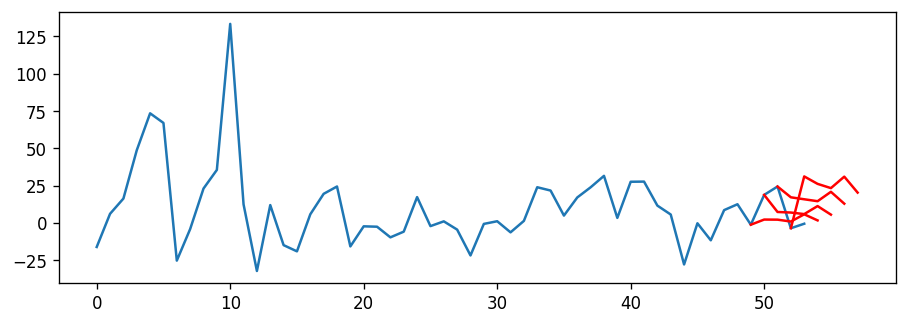

In [209]:
# plot the entire dataset in blue
pyplot.plot(df_only_annual.values)
# plot the forecasts in red
for i in range(len(test)):
  off_s = len(df_only_annual) - len(test) + i - 1
  off_e = off_s + len(inv_pred_y[i]) + 1
  xaxis = [x for x in range(off_s, off_e)]
  yaxis = np.concatenate((df_only_annual.values[off_s], inv_pred_y[i,:]))
  pyplot.plot(xaxis, yaxis, color='red')
# show the plot
pyplot.show()

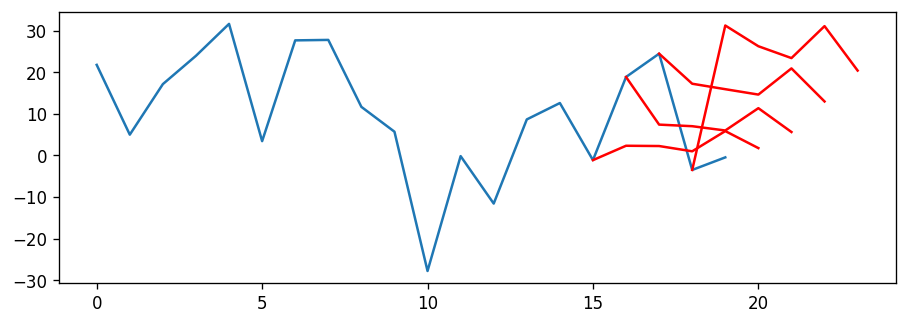

In [210]:
partial = df_only_annual.values[-20:]
pyplot.plot(partial)
# plot the forecasts in red
for i in range(len(test)):
  off_s = len(partial) - len(test) + i - 1
  off_e = off_s + len(inv_pred_y[i]) + 1
  xaxis = [x for x in range(off_s, off_e)]
  yaxis = np.concatenate((partial[off_s], inv_pred_y[i,:]))
  pyplot.plot(xaxis, yaxis, color='red')
# show the plot
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


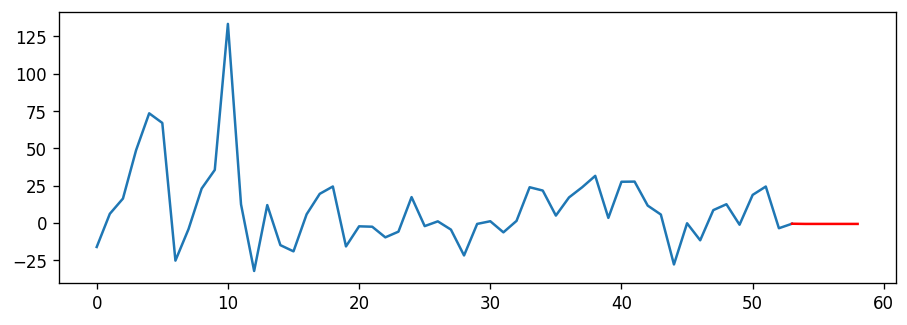

In [211]:
values = df_only_annual.values
last10 = values[-n_lag:]
last10 = scaler.transform(last10)
last10 = last10.reshape(1, n_lag, 1)
next5 = model.predict(last10)
inv_next5 = scaler.transform(next5.T)
partial = df_only_annual.values
pyplot.plot(partial)
off_s = len(partial) - 1
off_e = off_s + len(inv_next5) + 1
xaxis = [x for x in range(off_s, off_e)]
yaxis = np.concatenate((partial[off_s], inv_next5.reshape(len(inv_next5))))
pyplot.plot(xaxis, yaxis, color='red')
# show the plot
pyplot.show()

#### Using Annual % Change From Monthly Gold Prices (Univariate)

In [214]:
# transform series into train and test sets for supervised learning
def prepare_data(series, n_lag, n_seq):
  # rescale values to -1, 1
  col_name = series.columns[0][0]
  scaler = MinMaxScaler(feature_range=(-1, 1))
  scaled_values = scaler.fit_transform(series)
  scaled_values = scaled_values.reshape(len(scaled_values), 1)
  # transform into supervised learning problem X, y
  lag = series_to_lag(scaled_values, col_name, n_lag, n_seq)
  lag_values = lag.values
  n = len(lag_values)
  # split into train and test sets
  train, validation, test = lag_values[0:int(n*0.7), :], lag_values[int(n*0.7):int(n*0.9), :], lag_values[int(n*0.9):, :]
  return scaler, train, validation, test

In [215]:
n_lag = 10
n_seq = 5
# prepare data
scaler, train, validation, test = prepare_data(change_df, n_lag, n_seq)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [216]:
train_X, train_y = train[:, :n_lag], train[:, n_lag:]
val_X, val_y = validation[:, :n_lag], validation[:, n_lag:]
test_X, test_y = test[:, :n_lag], test[:, n_lag:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_lag, 1))
val_X = val_X.reshape((val_X.shape[0], n_lag, 1))
test_X = test_X.reshape((test_X.shape[0], n_lag, 1))
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)

(27, 10, 1) (27, 5) (8, 10, 1) (8, 5) (4, 10, 1) (4, 5)


Epoch 1/50
27/27 - 8s - loss: 0.3208 - accuracy: 0.1481 - val_loss: 0.3173 - val_accuracy: 0.3750 - 8s/epoch - 289ms/step
Epoch 2/50
27/27 - 0s - loss: 0.2680 - accuracy: 0.1481 - val_loss: 0.2819 - val_accuracy: 0.2500 - 332ms/epoch - 12ms/step
Epoch 3/50
27/27 - 0s - loss: 0.3328 - accuracy: 0.2593 - val_loss: 0.2882 - val_accuracy: 0.1250 - 362ms/epoch - 13ms/step
Epoch 4/50
27/27 - 0s - loss: 0.2925 - accuracy: 0.1481 - val_loss: 0.2924 - val_accuracy: 0.2500 - 339ms/epoch - 13ms/step
Epoch 5/50
27/27 - 0s - loss: 0.2825 - accuracy: 0.1111 - val_loss: 0.3016 - val_accuracy: 0.2500 - 377ms/epoch - 14ms/step
Epoch 6/50
27/27 - 0s - loss: 0.2618 - accuracy: 0.2222 - val_loss: 0.3011 - val_accuracy: 0.1250 - 345ms/epoch - 13ms/step
Epoch 7/50
27/27 - 0s - loss: 0.2626 - accuracy: 0.2222 - val_loss: 0.3055 - val_accuracy: 0.1250 - 331ms/epoch - 12ms/step
Epoch 8/50
27/27 - 0s - loss: 0.2610 - accuracy: 0.2222 - val_loss: 0.3068 - val_accuracy: 0.1250 - 383ms/epoch - 14ms/step
Epoch 9/50

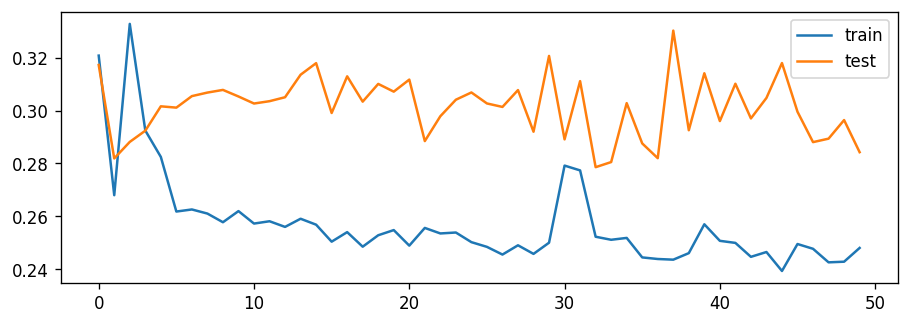

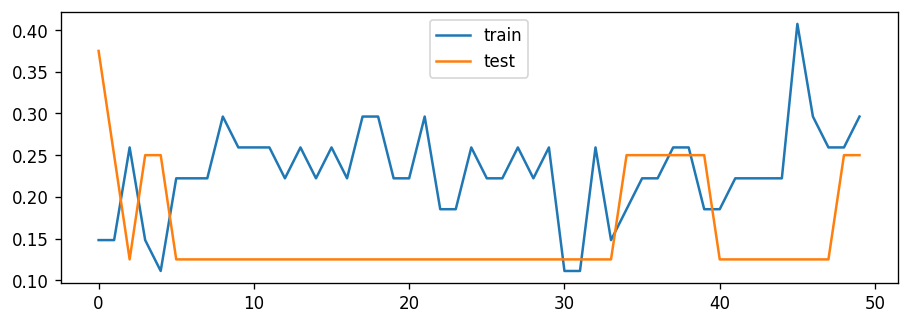

In [217]:
# fit an LSTM network to training data
n_batch = 1
model = Sequential()
# model.add(LSTM(50, batch_input_shape=(n_batch, train_X.shape[1], train_X.shape[2]), stateful=True))
# callback = callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=1, verbose=1)
model.add(LSTM(100, batch_input_shape=(n_batch, train_X.shape[1], train_X.shape[2]), stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(100,stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(100,stateful=True))
model.add(Dense(train_y.shape[1]))
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_y, epochs=50, validation_data=(val_X, val_y), batch_size=n_batch ,verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [218]:
y_pred = model.predict(test_X, batch_size = n_batch)

In [219]:
inv_pred_y = scaler.inverse_transform(y_pred)
inv_test_y = scaler.inverse_transform(test_y)
for i in range(len(inv_test_y[0])):
  print("Error t+"+str(i+1))
  print(forecast_accuracy(inv_pred_y[:,i], inv_test_y[:,i]))

Error t+1
{'mape': 4.478193989519006, 'me': 2.749258575663775, 'mae': 7.534268168145387, 'mpe': -4.478193989519006, 'rmse': 9.04537804733456, 'acf1': 0.16377411696067518, 'corr': 0.885666762877904, 'minmax': 2.6624146671758697}
Error t+2
{'mape': 12.296972445184684, 'me': -3.1560828602593065, 'mae': 4.8032934305056205, 'mpe': -12.050421986919114, 'rmse': 6.0568214412536765, 'acf1': -0.41539596197821355, 'corr': 0.23656768965912192, 'minmax': 11.796150883421431}
Error t+3
{'mape': 29.36320162233541, 'me': -14.893879048883324, 'mae': 14.893879048883324, 'mpe': -27.489393817648093, 'rmse': 16.526314875823783, 'acf1': -0.26621664292234654, 'corr': 0.5974911409599452, 'minmax': 27.489393817648097}
Error t+4
{'mape': 26.662315142974368, 'me': -14.982650961617036, 'mae': 14.982650961617036, 'mpe': -25.20128423971575, 'rmse': 16.978556311663322, 'acf1': 0.07509679199297305, 'corr': 0.772959637674889, 'minmax': 25.20128423971575}
Error t+5
{'mape': 0.983485980164203, 'me': -9.317604506456128, '

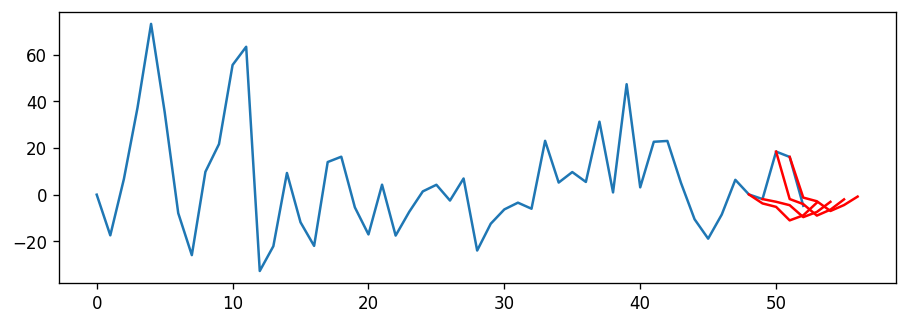

In [220]:
# plot the entire dataset in blue
pyplot.plot(change_df.values)
# plot the forecasts in red
for i in range(len(test)):
  off_s = len(change_df) - len(test) + i - 1
  off_e = off_s + len(inv_pred_y[i]) + 1
  xaxis = [x for x in range(off_s, off_e)]
  yaxis = np.concatenate((change_df.values[off_s], inv_pred_y[i,:]))
  pyplot.plot(xaxis, yaxis, color='red')
# show the plot

pyplot.show()

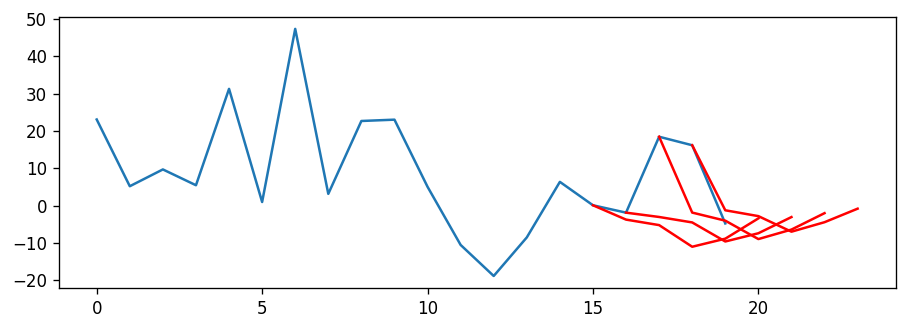

In [221]:
partial = change_df.values[-20:]
pyplot.plot(partial)
# plot the forecasts in red
for i in range(len(test)):
  off_s = len(partial) - len(test) + i - 1
  off_e = off_s + len(inv_pred_y[i]) + 1
  xaxis = [x for x in range(off_s, off_e)]
  yaxis = np.concatenate((partial[off_s], inv_pred_y[i,:]))
  pyplot.plot(xaxis, yaxis, color='red')
# show the plot
pyplot.show()

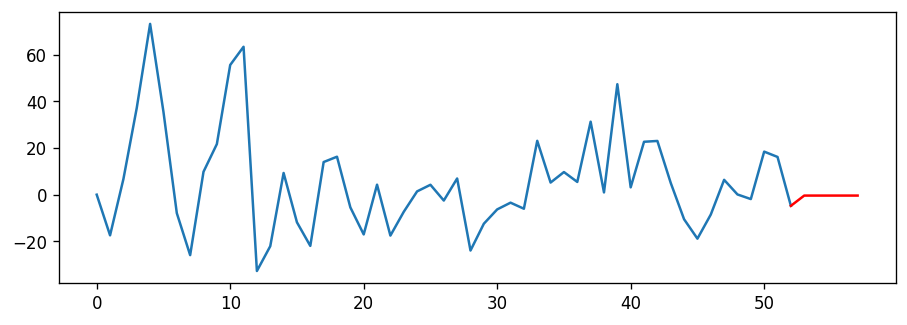

In [222]:
values = change_df.values
last10 = values[-n_lag:]
last10 = scaler.transform(last10)
last10 = last10.reshape(1, n_lag, 1)
next5 = model.predict(last10)
inv_next5 = scaler.transform(next5.T)
partial = change_df.values
pyplot.plot(partial)
off_s = len(partial) - 1
off_e = off_s + len(inv_next5) + 1
xaxis = [x for x in range(off_s, off_e)]
yaxis = np.concatenate((partial[off_s], inv_next5.reshape(len(inv_next5))))
pyplot.plot(xaxis, yaxis, color='red')
# show the plot
pyplot.show()

## Gold Prices in Month

In [223]:
gold_df = gold_df.set_index("Time")
gold_df.drop(gold_df.tail(1).index,inplace=True) # drop last n rows
gold_df = gold_df.sort_values("Time")
gold_df.head()

,Value
Time,
1969-01-01,340.11
1969-02-01,338.22
1969-03-01,335.42
1969-05-01,332.65
1969-06-01,330.81


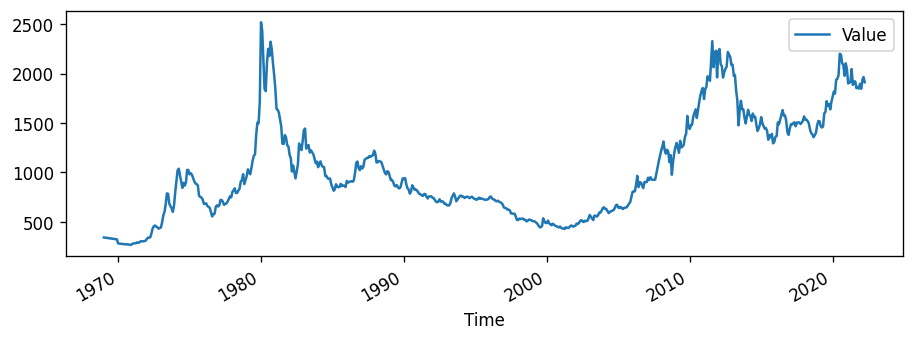

In [224]:
gold_df.plot()

### ARIMA

In [225]:
import pmdarima as pm
model = pm.auto_arima(gold_df.values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6806.720, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6820.921, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6822.394, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6822.062, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6819.657, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6799.234, Time=0.72 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6802.467, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6799.303, Time=0.88 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6800.697, Time=1.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6798.819, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6801.062, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6794.688, Time=1.01 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6797.745, Time=0.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6796.644, Time=1.15 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept

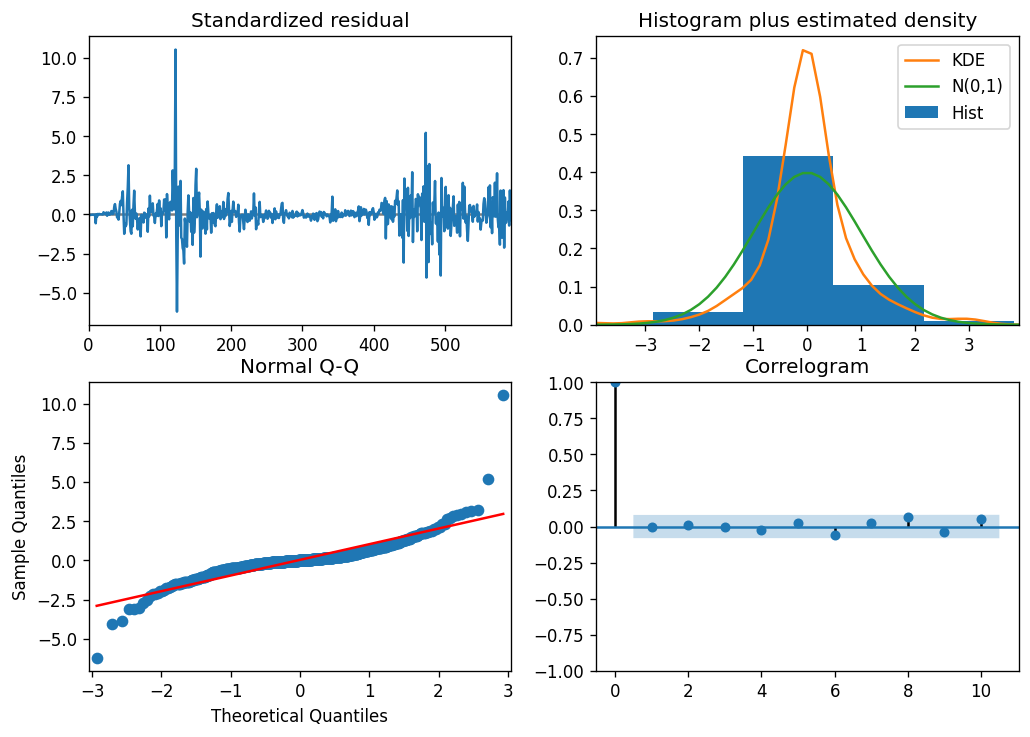

In [226]:
model.plot_diagnostics(figsize=(10,7))
plt.show()

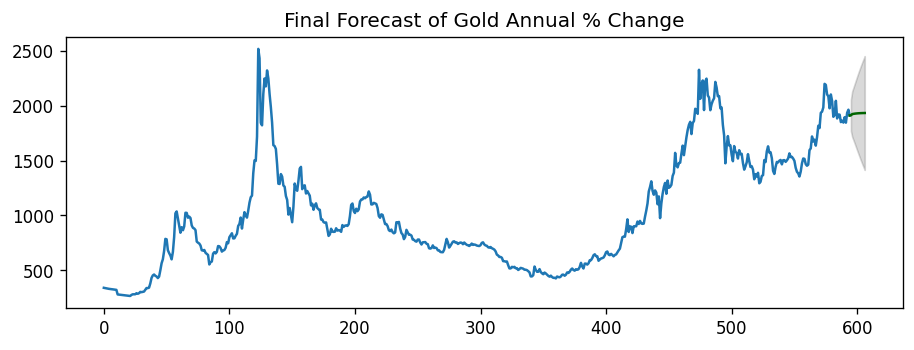

In [227]:
# Forecast
n_periods = 12
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(gold_df.values), len(gold_df.values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(gold_df.values)
plt.plot(range(len(gold_df.values)-1,len(gold_df.values) + n_periods), np.concatenate(([[gold_df.values.flatten()[-1]], fc_series])), color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Gold Annual % Change")
plt.show()

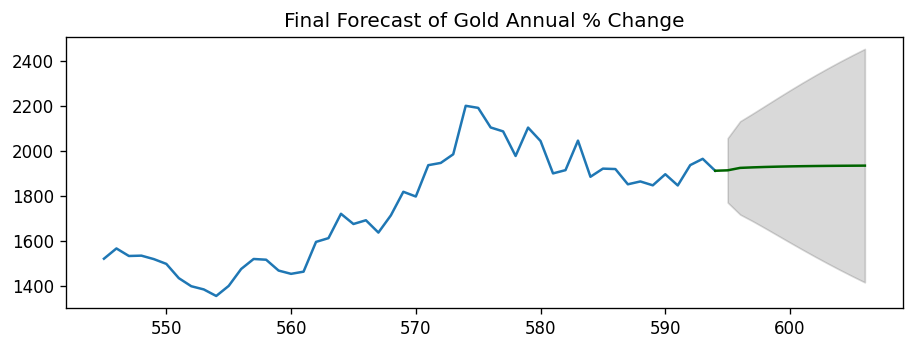

In [228]:
# Plot
plt.plot(range(len(gold_df.values)-50,len(gold_df.values)) ,gold_df.values[-50:])
plt.plot(range(len(gold_df.values)-1,len(gold_df.values) + n_periods), np.concatenate(([[gold_df.values.flatten()[-1]], fc_series])), color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Gold Annual % Change")
plt.show()

### Keras

In [229]:
def prepare_data(series, n_lag, n_seq):
  # rescale values to -1, 1
  col_name = series.columns[0][0]
  scaler = MinMaxScaler()
  scaled_values = scaler.fit_transform(series)
  scaled_values = scaled_values.reshape(len(scaled_values), 1)
  # transform into supervised learning problem X, y
  lag = series_to_lag(scaled_values, col_name, n_lag, n_seq)
  lag_values = lag.values
  n = len(lag_values)
  # split into train and test sets
  train, validation, test = lag_values[0:int(n*0.7), :], lag_values[int(n*0.7):int(n*0.9), :], lag_values[int(n*0.9):, :]
  return scaler, train, validation, test

In [230]:
n_lag = 120
n_seq = 12
# prepare data
scaler, train, validation, test = prepare_data(gold_df, n_lag, n_seq)

In [231]:
train_X, train_y = train[:, :n_lag], train[:, n_lag:]
val_X, val_y = validation[:, :n_lag], validation[:, n_lag:]
test_X, test_y = test[:, :n_lag], test[:, n_lag:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_lag, 1))
val_X = val_X.reshape((val_X.shape[0], n_lag, 1))
test_X = test_X.reshape((test_X.shape[0], n_lag, 1))
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)

(324, 120, 1) (324, 12) (93, 120, 1) (93, 12) (47, 120, 1) (47, 12)


Epoch 1/50
324/324 - 38s - loss: 0.0423 - accuracy: 0.1451 - val_loss: 0.1449 - val_accuracy: 0.1505 - 38s/epoch - 117ms/step
Epoch 2/50
324/324 - 30s - loss: 0.0352 - accuracy: 0.2006 - val_loss: 0.1945 - val_accuracy: 0.0860 - 30s/epoch - 94ms/step
Epoch 3/50
324/324 - 31s - loss: 0.0443 - accuracy: 0.1636 - val_loss: 0.2019 - val_accuracy: 0.1935 - 31s/epoch - 97ms/step
Epoch 4/50
324/324 - 31s - loss: 0.0482 - accuracy: 0.1451 - val_loss: 0.2128 - val_accuracy: 0.0430 - 31s/epoch - 97ms/step
Epoch 4: early stopping


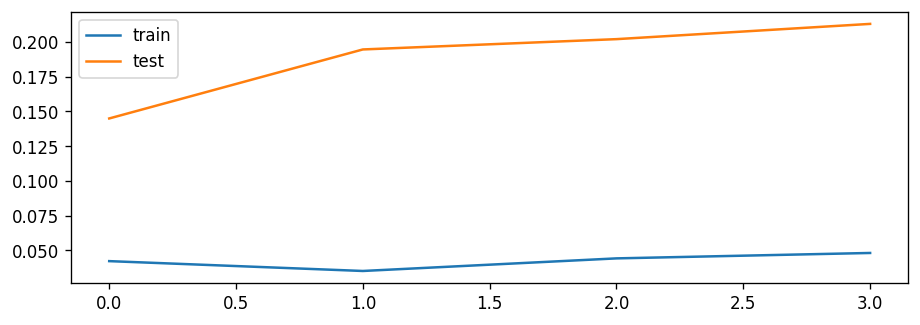

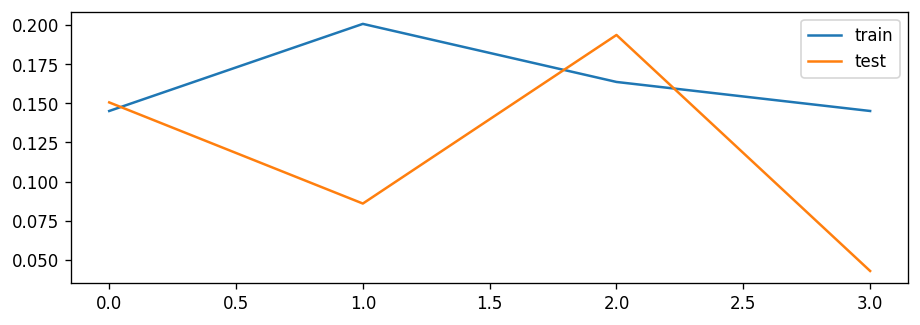

In [232]:
# fit an LSTM network to training data
n_batch = 1
model = Sequential()
# model.add(LSTM(100, batch_input_shape=(n_batch, train_X.shape[1], train_X.shape[2]), stateful=True))
callback = callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001, verbose=1)
model.add(LSTM(100, batch_input_shape=(n_batch, train_X.shape[1], train_X.shape[2]), stateful=True, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100,stateful=True, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100,stateful=True))
model.add(Dense(train_y.shape[1]))
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_y, epochs=50, validation_data=(val_X, val_y), batch_size=n_batch ,verbose=2, shuffle=False, callbacks=[callback])
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [233]:
y_pred = model.predict(test_X, batch_size = n_batch)

In [234]:
inv_pred_y = scaler.inverse_transform(y_pred)
inv_test_y = scaler.inverse_transform(test_y)
for i in range(len(inv_test_y[0])):
  print("Error t+"+str(i+1))
  print(forecast_accuracy(inv_pred_y[:,i], inv_test_y[:,i]))

Error t+1
{'mape': 0.3573994191169474, 'me': -619.856563642786, 'mae': 619.856563642786, 'mpe': -0.3573994191169474, 'rmse': 667.5867249019121, 'acf1': 0.9307773511056385, 'corr': -0.919163015952449, 'minmax': 0.3573994191169474}
Error t+2
{'mape': 0.2757659808675975, 'me': -488.0173575673206, 'mae': 488.0173575673206, 'mpe': -0.2757659808675975, 'rmse': 546.0346845619576, 'acf1': 0.9431691673748146, 'corr': 0.7248522596438486, 'minmax': 0.2757659808675973}
Error t+3
{'mape': 0.2820527032382615, 'me': -501.48789405335776, 'mae': 501.48789405335776, 'mpe': -0.2820527032382615, 'rmse': 559.2712361031674, 'acf1': 0.9416163966853118, 'corr': 0.09459693780309904, 'minmax': 0.28205270323826137}
Error t+4
{'mape': 0.2694610113161557, 'me': -483.0872998046875, 'mae': 483.0872998046875, 'mpe': -0.2694610113161557, 'rmse': 542.5143615780183, 'acf1': 0.9391293310309015, 'corr': 0.6266659477657831, 'minmax': 0.2694610113161555}
Error t+5
{'mape': 0.2878993095380017, 'me': -515.8912188331117, 'mae'

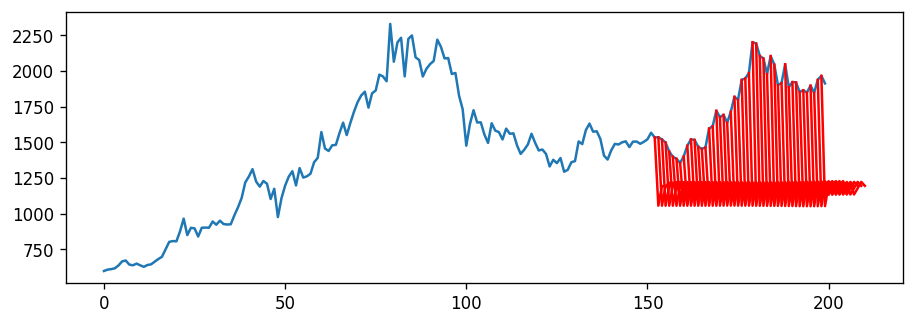

In [235]:
partial = gold_df.values[-200:]
pyplot.plot(partial)
# plot the forecasts in red
for i in range(len(test)):
  off_s = len(partial) - len(test) + i - 1
  off_e = off_s + len(inv_pred_y[i]) + 1
  xaxis = [x for x in range(off_s, off_e)]
  yaxis = np.concatenate((partial[off_s], inv_pred_y[i,:]))
  pyplot.plot(xaxis, yaxis, color='red')
# show the plot
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


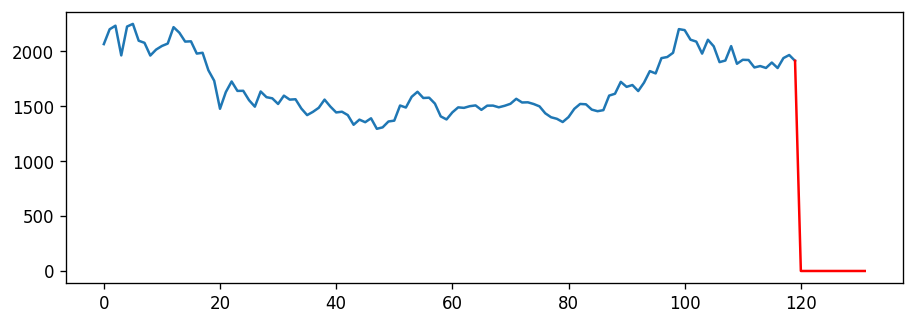

In [236]:
values = gold_df.values
last10 = values[-n_lag:]
last10 = scaler.transform(last10)
last10 = last10.reshape(1, n_lag, 1)
next5 = model.predict(last10)
inv_next5 = scaler.transform(next5.T)
partial = gold_df.values[-n_lag:]
pyplot.plot(partial)
off_s = len(partial) - 1
off_e = off_s + len(inv_next5) + 1
xaxis = [x for x in range(off_s, off_e)]
yaxis = np.concatenate((partial[off_s], inv_next5.reshape(len(inv_next5))))
pyplot.plot(xaxis, yaxis, color='red')
# show the plot
pyplot.show()

# Evaluation

Dari 5 model yang sudah dilatih untuk memprediksi annual % change 5 tahun kedepan. Terdapat 4 model yang memprediksi annual % change tidak terdapat perubahan yang besar. Namun untuk model yang dilatih dengan menggunakan semua atribut pada tabel atau univariate, prediksi yang didapatkan membentuk cycle.

Berdasarkan ke 5 model tersebut, model yang menggunakan data annual % change yang didapatkan dari scraping grafik dengan arsitektur LSTM memiliki nilai rata-rata error MAE dan RMSE yang paling kecil.

Sehingga berdasarkan analisis tersebut, model yang menggunakan annual % change dari monthly gold prices dengan arsitektur LSTM yang diduga merupakan model terbaik. Berikut adalah grafik annual % change 5 tahun kedepan.    
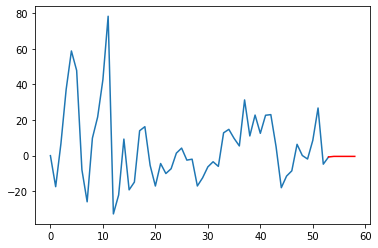

Selanjutnya kami melakukan analisis tambahan dengan menggunakan harga emas perbulan. Dengan menggunakan data monthly prices yang kami dapatkan dari grafik. Terdapat perbedaan yang besar antara model menggunakan ARIMA dan LSTM. Model ARIMA memprediksi bahwa harga emas 12 bulan kedepan akan stabil sedangkan model LSTM memprediksi bahwa harga emas akan jatuh dan bernilai 0 untuk 12 bulan kedepan. Kami menduga bahwa hal tersebut terjadi karena arsitektur yang buruk dan nilai loss yang sangat besar pada data validasi.

# Reference
- https://towardsdatascience.com/a-guide-to-scraping-html-tables-with-pandas-and-beautifulsoup-7fc24c331cf7
- https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-two/
- https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
- https://machinelearningmastery.com/multi-step-time-series-forecasting-long-short-term-memory-networks-python/
- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
